
# Kütüphanelerin Eklenmesi


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Insurance.csv Dosyasının Okunması

In [9]:
df=pd.read_csv("/content/drive/MyDrive/AiGlobalHub/insurance.csv")

# Keşifsel Veri Analizinin Yapılması

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


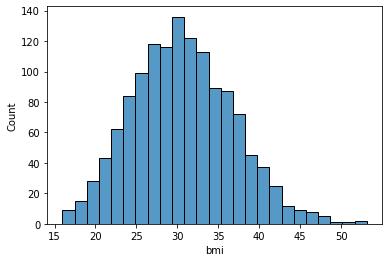

In [12]:
#Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz.
sns.histplot(data=df, x="bmi")
#Verimiz 15 ile 50 arasında dağılmaktadır.
#Ortalama ve medyan değerleri 30 olarak belirlenmiştir.

<BarContainer object of 1338 artists>

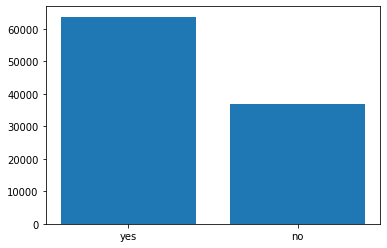

In [13]:
#“smoker” ile “charges” arasındaki ilişkiyi inceleyiniz
plt.bar(df["smoker"],df["charges"])
#Sigara kullanan bireylerden daha riskli olduğundan daha çok sigorta ücreti ödemiştir.

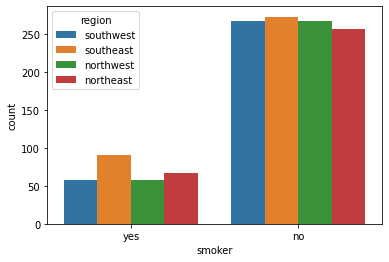

In [14]:
sns.countplot(x="smoker", hue="region",data=df)
#Sigara içen sayısı daha azdır.
#Bölgesel olarak bakıldığında "Southeast" bölgesinde sigara kullanımı daha fazladır.

<BarContainer object of 1338 artists>

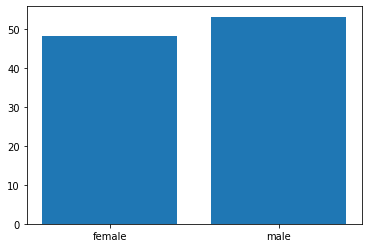

In [15]:
plt.bar(df["sex"],df["bmi"])
# Erkek bireylerin vücut kitle endeksi daha yüksek çıkmıştır.

children,0,1,2,3,4,5
region,,,,,,
northeast,147,77,51,39,7,3
northwest,132,74,66,46,6,1
southeast,157,95,66,35,5,6
southwest,138,78,57,37,7,8


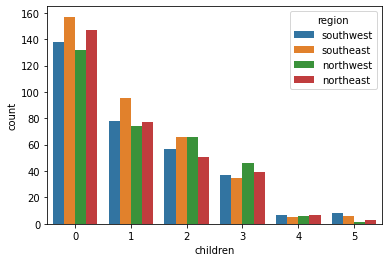

In [16]:
ax = sns.countplot(x="children", hue="region",data=df)
pd.crosstab(df["region"],df["children"])


<BarContainer object of 4 artists>

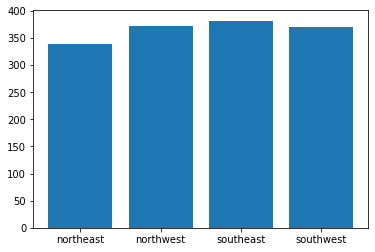

In [17]:
children = df.groupby(by=df["region"]).sum().reset_index()
plt.bar(children["region"],children["children"])
#Southeast bölgesinde daha çok çoçuk bulunmaktadır.

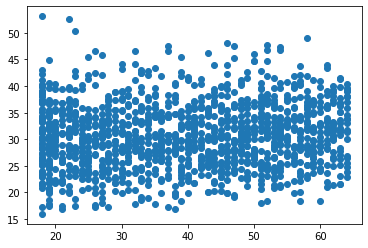

In [18]:
plt.scatter(df["age"],df["bmi"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

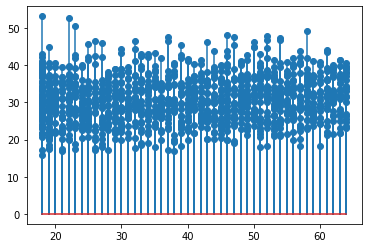

In [19]:
x = df["age"]
y=df["bmi"]

plt.stem(x,y)
#Genel olarak bakıldığında bmi değerleri 40 ile 15 arasında dağılmıştır.

<BarContainer object of 1338 artists>

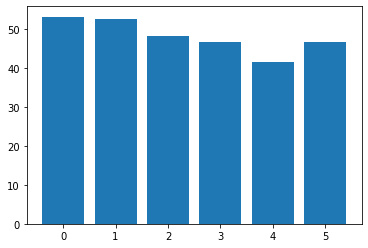

In [20]:
plt.bar(df["children"],df["bmi"])

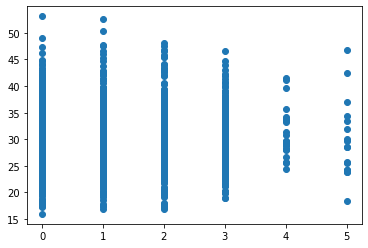

In [21]:
plt.scatter(df["children"],df["bmi"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


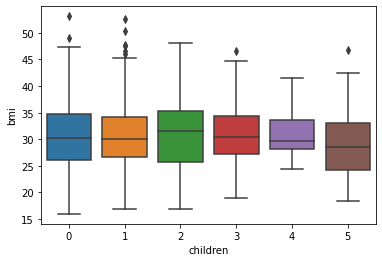

In [22]:
sns.boxplot(df["children"],df["bmi"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


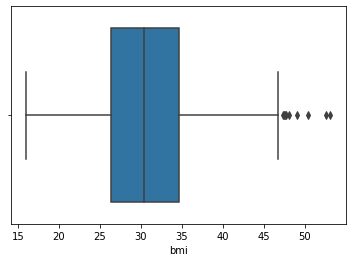

In [23]:
sns.boxplot(df["bmi"])

In [24]:
Q1 = np.percentile(df["bmi"] , 25)
Q3 = np.percentile(df["bmi"] , 75)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
print(ul,ll)
outliers = df[(df["bmi"] > ul) | (df["bmi"] < ll)]
outliers
# 47.29'un üstü ve 13.7'nin altında bulunan bmi değerleri outlierdır.

47.290000000000006 13.7


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


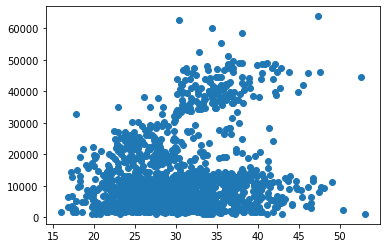

In [25]:
plt.scatter(df["bmi"],df["charges"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

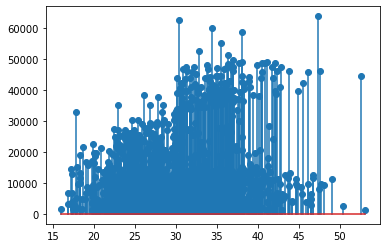

In [26]:
x = df["bmi"]
y=df["charges"]

plt.stem(x,y)

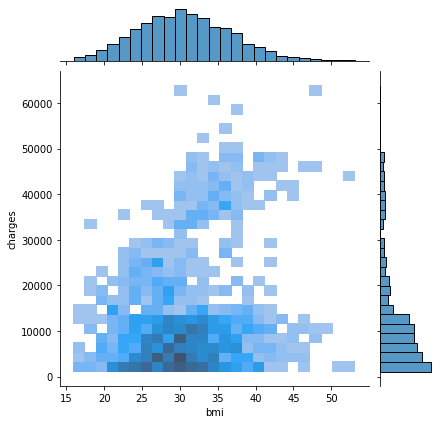

In [27]:
sns.jointplot(data=df, x="bmi", y="charges",kind="hist")
# Bmi 20 -35 arası, charges 20000 - 0 arasında yoğunlaşmaktadır.
# Bmi 30 - 45 arası, charges 30000- 50000 arasında da daha seyrek bir dağılım görülmektedir.

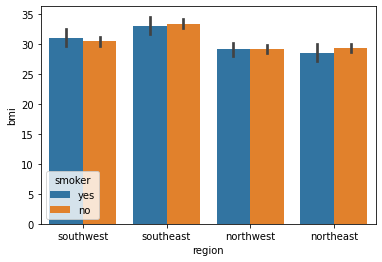

In [28]:
sns.barplot(x=df["region"],y=df["bmi"], hue=df["smoker"])
#Bölge bazında bakıldığında sigara içen ve içmeyen bireyler eşit olarak dağılmıştır.
#Southeast bölgesindeki bireylerin bmi değerleri diğerlerine göre oldukça büyük bulunmuştur.

# Kategorik değişkenleri düzenlemek için Label ve One-Hot Encoding tekniklerinin kullanılması.

In [29]:
# One Hot Encoding
ohdf = pd.get_dummies(df, columns = ['region'])

In [30]:
# Label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sex = le.fit_transform(df["sex"])
smoker = le.fit_transform(df["smoker"])
ohdf["smoker"]=smoker


# Veri setinin X_train,X_test, y_train, y_test olacak şekilde bölüştürülemesi.

In [31]:
ohdf["sex"]=sex

In [32]:
y=ohdf["charges"]
X=ohdf.drop(["charges"],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42) 

# Veri Setinin Normalize Edilmesi

In [33]:
min_max_scaler = preprocessing.MinMaxScaler()
cols=X_train.columns
np_scaled_train = min_max_scaler.fit_transform(X_train)
np_scaled_test = min_max_scaler.fit_transform(X_test)

In [34]:
X_train = pd.DataFrame(np_scaled_train, columns = cols)
X_test = pd.DataFrame(np_scaled_test, columns = cols)

In [35]:
X_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.586957,0.0,0.233748,0.4,0.0,1.0,0.0,0.0,0.0
1,0.391304,0.0,0.369216,0.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.0,0.281560,0.0,1.0,0.0,1.0,0.0,0.0
3,0.608696,1.0,0.249685,0.6,0.0,0.0,1.0,0.0,0.0
4,0.021739,1.0,0.422340,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
263,0.978261,1.0,0.510974,0.0,1.0,0.0,0.0,1.0,0.0
264,0.869565,0.0,0.289529,0.0,0.0,0.0,1.0,0.0,0.0
265,0.434783,1.0,0.313435,0.2,0.0,1.0,0.0,0.0,0.0
266,0.782609,0.0,0.855445,0.0,1.0,0.0,0.0,1.0,0.0


# Birkaç Regresyon Modeli Seçilip Denenmesi

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
#Lineer Regresyon
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
y_pred

array([ 8800.,  7008., 36736.,  9296., 26912., 10864.,     0., 16960.,
         800., 11104., 27776.,  9312.,  5136., 38432., 40272., 37072.,
       15312., 35872.,  8960., 31344.,  3520.,  9968.,  2176.,  7200.,
       11200., 12912., 14416.,  6096.,  9808.,  2048.,  8896., 13056.,
        4512.,  3168.,  4256., 13088.,  1744.,  8624., 33104., 32512.,
        3664.,  4272., 14048., 11280.,  8720., 11872.,  5264.,  2864.,
       35408.,  9136., 15824.,  2192., 12480.,  1312., 13328., 12496.,
        4160., 32128., 13200., 12864., 14032., 10576., 16256.,  7616.,
       11760.,  3936., 26336., 10720.,  1952.,  6160., 10736., 11568.,
       10912.,  9056., 11936.,  6624.,  7168., 10624.,  6496.,  8496.,
        3680., 36464.,  6192., 30816., 35040., 35184.,  6880., 12832.,
        9888., 14368., 17728., 35024., 32864.,  6032., 31936.,  9312.,
       29264.,  3600., 28112.,  5616.,  5328.,  1696., 11536., 14960.,
       11504.,  4240.,  9760., 31408.,  -320., 32560.,  3136., 10304.,
      

In [38]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print("r2 score: ",r2_score(y_test,y_pred))

MAE:  4180.7536169738805
MSE:  33571173.58547557
r2 score:  0.783758789763416


In [39]:
# XGBoost Regresyon
from xgboost import XGBRegressor 
model = XGBRegressor()
model.fit(X_train,y_train)
pred_xg = model.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,pred_xg))
print('MSE: ',metrics.mean_squared_error(y_test,pred_xg))
print("r2 score: ",r2_score(y_test,pred_xg))

[17:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:  2361.1937241632754
MSE:  17978893.509561498
r2 score:  0.8841929764140186


In [40]:
# Support Vector Machine Regresyon
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
pred_svr=svr.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,pred_svr))
print('MSE: ',metrics.mean_squared_error(y_test,pred_svr))
print("r2 score: ",r2_score(y_test,pred_svr))

MAE:  8618.386481299132
MSE:  166118204.62935895
r2 score:  -0.07001328148153929


In [41]:
# Random Forest Regresyon
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=10,random_state=42)
rf_reg.fit(X_train,y_train)
pred_rf = rf_reg.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,pred_rf))
print('MSE: ',metrics.mean_squared_error(y_test,pred_rf))
print("r2 score: ",r2_score(y_test,pred_rf))

MAE:  2544.828681379975
MSE:  21420593.36360628
r2 score:  0.8620240361529695


In [53]:
import lightgbm as ltb
ltb_model = ltb.LGBMRegressor()
ltb_model.fit(X_train,y_train)
pred_ltb = ltb_model.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,pred_ltb))
print('MSE: ',metrics.mean_squared_error(y_test,pred_ltb))
print("r2 score: ",r2_score(y_test,pred_ltb))

MAE:  2577.0548943228073
MSE:  20777360.762430202
r2 score:  0.8661672751668752


In [56]:
!pip install catboost
import catboost as cb
cb_model = cb.CatBoostRegressor(loss_function="RMSE")
cb_model.fit(X_train,y_train)
pred_cb = cb_model.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,pred_cb))
print('MSE: ',metrics.mean_squared_error(y_test,pred_cb))
print("r2 score: ",r2_score(y_test,pred_cb))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Learning rate set to 0.041383
0:	learn: 11634.8090716	total: 896us	remaining: 896ms
1:	learn: 11306.5503133	total: 2.33ms	remaining: 1.16s
2:	learn: 10983.8009443	total: 3.59ms	remaining: 1.19s
3:	learn: 10652.7732592	total: 5.12ms	remaining: 1.27s
4:	learn: 10360.5046413	total: 6.43ms	remaining: 1.28s
5:	learn: 10060.7006045	total: 10.2ms	remaining: 1.68s
6:	learn: 9781.5058712	total: 11.4ms	remaining: 1.61s
7:	learn: 9518.8176570	total: 14.2ms	remaining: 1.76s
8:	learn: 9258.3261792	total: 16ms	remaining: 1.76s
9:	learn: 9014.2867582	total: 18.4ms	remaining: 1.82s
10:	learn: 8786.0158803	total: 20.8ms	remaining: 1.87s
11:	learn: 8549.8811049	total: 23ms	remaining: 1.89s
12:	learn: 8343.7127118	total: 26.1ms	remaining: 1.98s
13:	learn: 8134.5658705	total: 27.9ms	remaining: 1.97s
14:	learn: 7939.9606544	total: 30.2ms	remaining: 1.99s
15:	learn: 7752.1026674	total: 32.7ms	remaining: 2.01s


Altı tane regresyon modeli denendi. En iyi performans gösteren regresyon modeli XGBoost Regresyon modeli olmuştur.

# Seçilen Modelin Performansı Cross Validation Kullanılarak İncelendi

In [42]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(model,X_train,y_train,cv=kf)
print("Cross Validation Score are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

[17:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation Score are [0.83674851 0.91882059 0.825454   0.79057074 0.84698618]
Average Cross Validation score :0.8437160021205425


In [43]:
kf=KFold(n_splits=5)
score=cross_val_score(rf_reg,X_train,y_train,cv=kf)
print("Cross Validation Score are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Score are [0.8154961  0.89117666 0.78208545 0.76802772 0.82092793]
Average Cross Validation score :0.815542771472168


# GridSearch İle Hyperparametre Optimizasyonu Uygulandı

In [44]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
clf = GridSearchCV(estimator=model, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
grid_search = clf.fit(X_train,y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[17:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:45] WARNING: /workspace/src/objective/regr

In [45]:
clf.best_params_  #Grid Search ile en iyi sonuçları verebilecek parametreleri bulduk. 

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 100}

In [46]:
param={'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 100}
model = XGBRegressor(colsample_bytree=0.7,learning_rate= 0.05,max_depth= 3,n_estimators= 100)
model.fit(X_train,y_train)
pred_xg = model.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,pred_xg))
print('MSE: ',metrics.mean_squared_error(y_test,pred_xg))
print("r2 score: ",r2_score(y_test,pred_xg))

[17:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:  2465.3048999131875
MSE:  18754180.086311717
r2 score:  0.8791991412354601


## Başka bir HyperParametre Optimizasyon Yöntemi olan Optuna İmport Edilip Denendi

In [47]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 4.0 MB/s 
     |████████████████████████████████| 209 kB 54.7 MB/s 
     |████████████████████████████████| 81 kB 10.6 MB/s 
     |████████████████████████████████| 78 kB 8.3 MB/s 
     |████████████████████████████████| 112 kB 46.6 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 147 kB 46.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=466333ec5017bfe7b6de512bbac063e13339d8e85fa86f64205dd6b19c14d5c8
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [48]:
from sklearn.metrics import mean_squared_error
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score
def return_score(param):
  model = XGBRegressor(**param)  
  rmse = -np.mean(cross_val_score(model,X_train,y_train, cv = 4, n_jobs =-1,scoring='neg_root_mean_squared_error'))
  return rmse
def objective(trial):
  param = {
                "n_estimators" : trial.suggest_int('n_estimators', 0, 500),
                'max_depth':trial.suggest_int('max_depth', 3, 5),
                'reg_alpha':trial.suggest_uniform('reg_alpha',0,6),
                'reg_lambda':trial.suggest_uniform('reg_lambda',0,2),
                'min_child_weight':trial.suggest_int('min_child_weight',0,5),
                'gamma':trial.suggest_uniform('gamma', 0, 4),
                'learning_rate':trial.suggest_loguniform('learning_rate',0.05,0.5),
                'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.4,0.9),
                'subsample':trial.suggest_uniform('subsample',0.4,0.9),
                'nthread' : -1
            }
  return(return_score(param)) # this will return the rmse score

In [49]:
study1 = optuna.create_study(direction='minimize',sampler=TPESampler())
study1.optimize(objective, n_trials= 550,show_progress_bar = True)
bestparam=study1.best_params


[I 2022-08-27 17:29:32,283] Trial 166 finished with value: 4592.669267791643 and parameters: {'n_estimators': 51, 'max_depth': 3, 'reg_alpha': 4.193945523820966, 'reg_lambda': 1.546829097802394, 'min_child_weight': 3, 'gamma': 2.276037963916954, 'learning_rate': 0.08037852305864315, 'colsample_bytree': 0.8324690425514127, 'subsample': 0.891437078229843}. Best is trial 165 with value: 4571.824435356775.
[I 2022-08-27 17:29:32,511] Trial 167 finished with value: 4628.309414337904 and parameters: {'n_estimators': 62, 'max_depth': 4, 'reg_alpha': 4.003036699478268, 'reg_lambda': 1.5977185518908976, 'min_child_weight': 3, 'gamma': 2.441444164990607, 'learning_rate': 0.07671043069959277, 'colsample_bytree': 0.890906582787313, 'subsample': 0.8834949019395909}. Best is trial 165 with value: 4571.824435356775.
[I 2022-08-27 17:29:32,713] Trial 168 finished with value: 4583.331919220676 and parameters: {'n_estimators': 73, 'max_depth': 3, 'reg_alpha': 3.491662831625526, 'reg_lambda': 0.310448771

Optimim Hyperparametreler ile Modelin Değerlendirilmesi

In [50]:
model = XGBRegressor(**bestparam)
model.fit(X_train,y_train)
pred_xg = model.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,pred_xg))
print('MSE: ',metrics.mean_squared_error(y_test,pred_xg))
print("r2 score: ",r2_score(y_test,pred_xg))

[17:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:  2421.9424364460997
MSE:  18329074.191446576
r2 score:  0.8819373658301497


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
